## Heart Failure Prediction using ANN

## Importing Necessary Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report as cr

## Loading the Dataset

In [ ]:
heart_failure_df = pd.read_csv('/content/sample_data/heart_failure_dataset.csv')
heart_failure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Dataset Explaination

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

Thirteen (13) clinical features:

age: age of the patient (years)

anaemia: decrease of red blood cells or hemoglobin (boolean) 0: No, 1: Yes

high blood pressure: if the patient has hypertension (boolean) 0: No, 1: Yes

creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)

diabetes: if the patient has diabetes (boolean) 0: No, 1: Yes

ejection fraction: percentage of blood leaving the heart at each contraction (percentage)

platelets: platelets in the blood (kiloplatelets/mL)

sex: woman or man (binary) 0: woman, 1: man

serum creatinine: level of serum creatinine in the blood (mg/dL)

serum sodium: level of serum sodium in the blood (mEq/L)

smoking: if the patient smokes or not (boolean) 0: notsmoking, 1: smoking

time: follow-up period (days)

death event: if the patient deceased during the follow-up period (boolean) 0:No, 1:Yes

In [ ]:
# Info of the dataset
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# Describing the dataset
heart_failure_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Exploratory Data Analysis

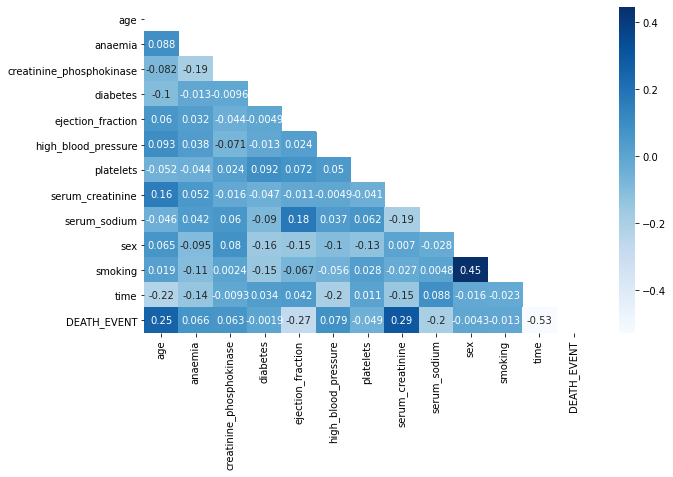

In [ ]:
# Checking correlation between the features
fig, ax = plt.subplots(figsize=(10,6)) 
mask = np.triu(np.ones_like(heart_failure_df.corr()))
sns.heatmap(heart_failure_df.corr(), annot=True, cmap='Blues',mask=mask)

As we can see the correlation between the sex and smoking is higher (0.45) compared to any other features.

In [ ]:
# Checking for null values
heart_failure_df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

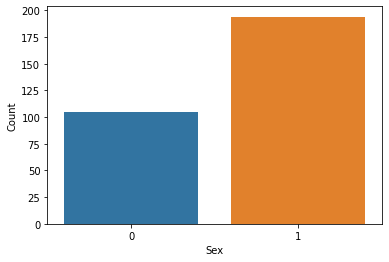

In [ ]:
# Ploting sex column
sns.countplot(x="sex",data=heart_failure_df)
plt.ylabel("Count")
plt.xlabel("Sex")
plt.show()

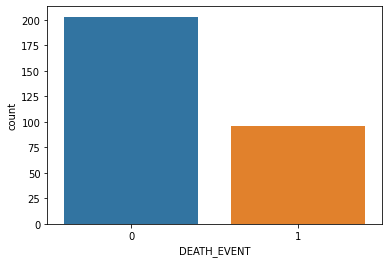

In [ ]:
# Ploting death event count
sns.countplot(x=heart_failure_df['DEATH_EVENT'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

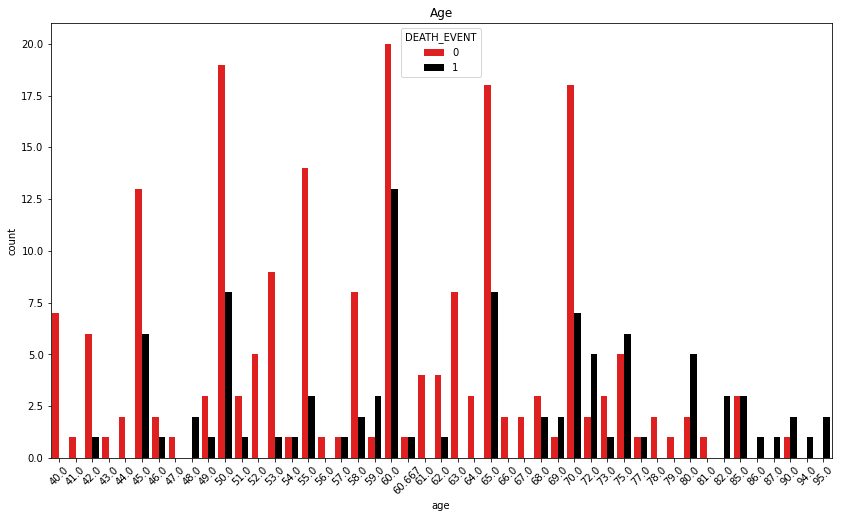

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x=heart_failure_df['age'], hue=heart_failure_df['DEATH_EVENT'], palette=('red','black'))
plt.title('Age')
plt.xticks(rotation=45)

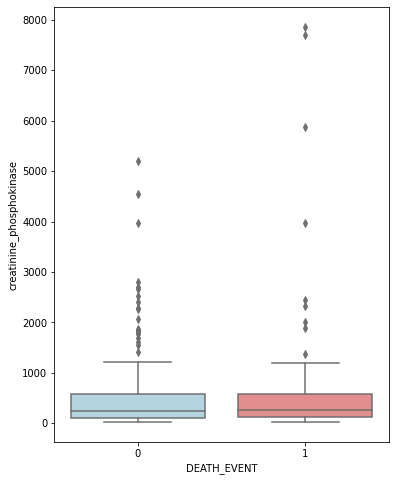

In [ ]:
# Ploting Death event and creatinine levels
plt.figure(figsize=(6,8))
sns.boxplot(y=heart_failure_df['creatinine_phosphokinase'], x= heart_failure_df['DEATH_EVENT'], palette=("#add8e6","#f08080"))

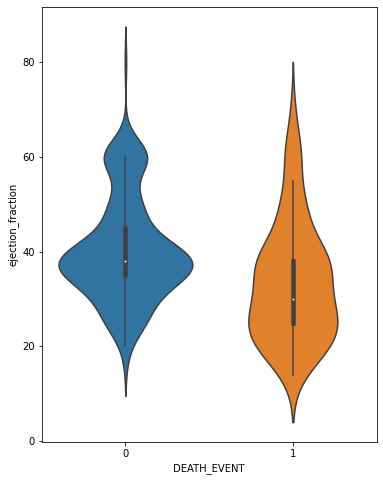

In [ ]:
# Ploting Ejection fraction and derath event
plt.figure(figsize=(6,8))
sns.violinplot(y=heart_failure_df['ejection_fraction'], x=heart_failure_df['DEATH_EVENT'])

Text(0.5, 1.0, 'Time Effect')

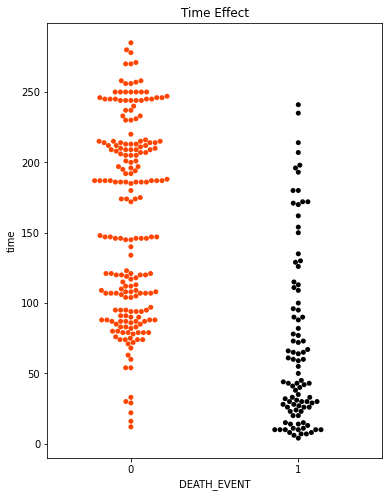

In [ ]:
# Ploting time and death event
plt.figure(figsize=(6,8))
sns.swarmplot(y=heart_failure_df['time'], x=heart_failure_df['DEATH_EVENT'], palette=("#ff4500", "black"))
plt.title('Time Effect')

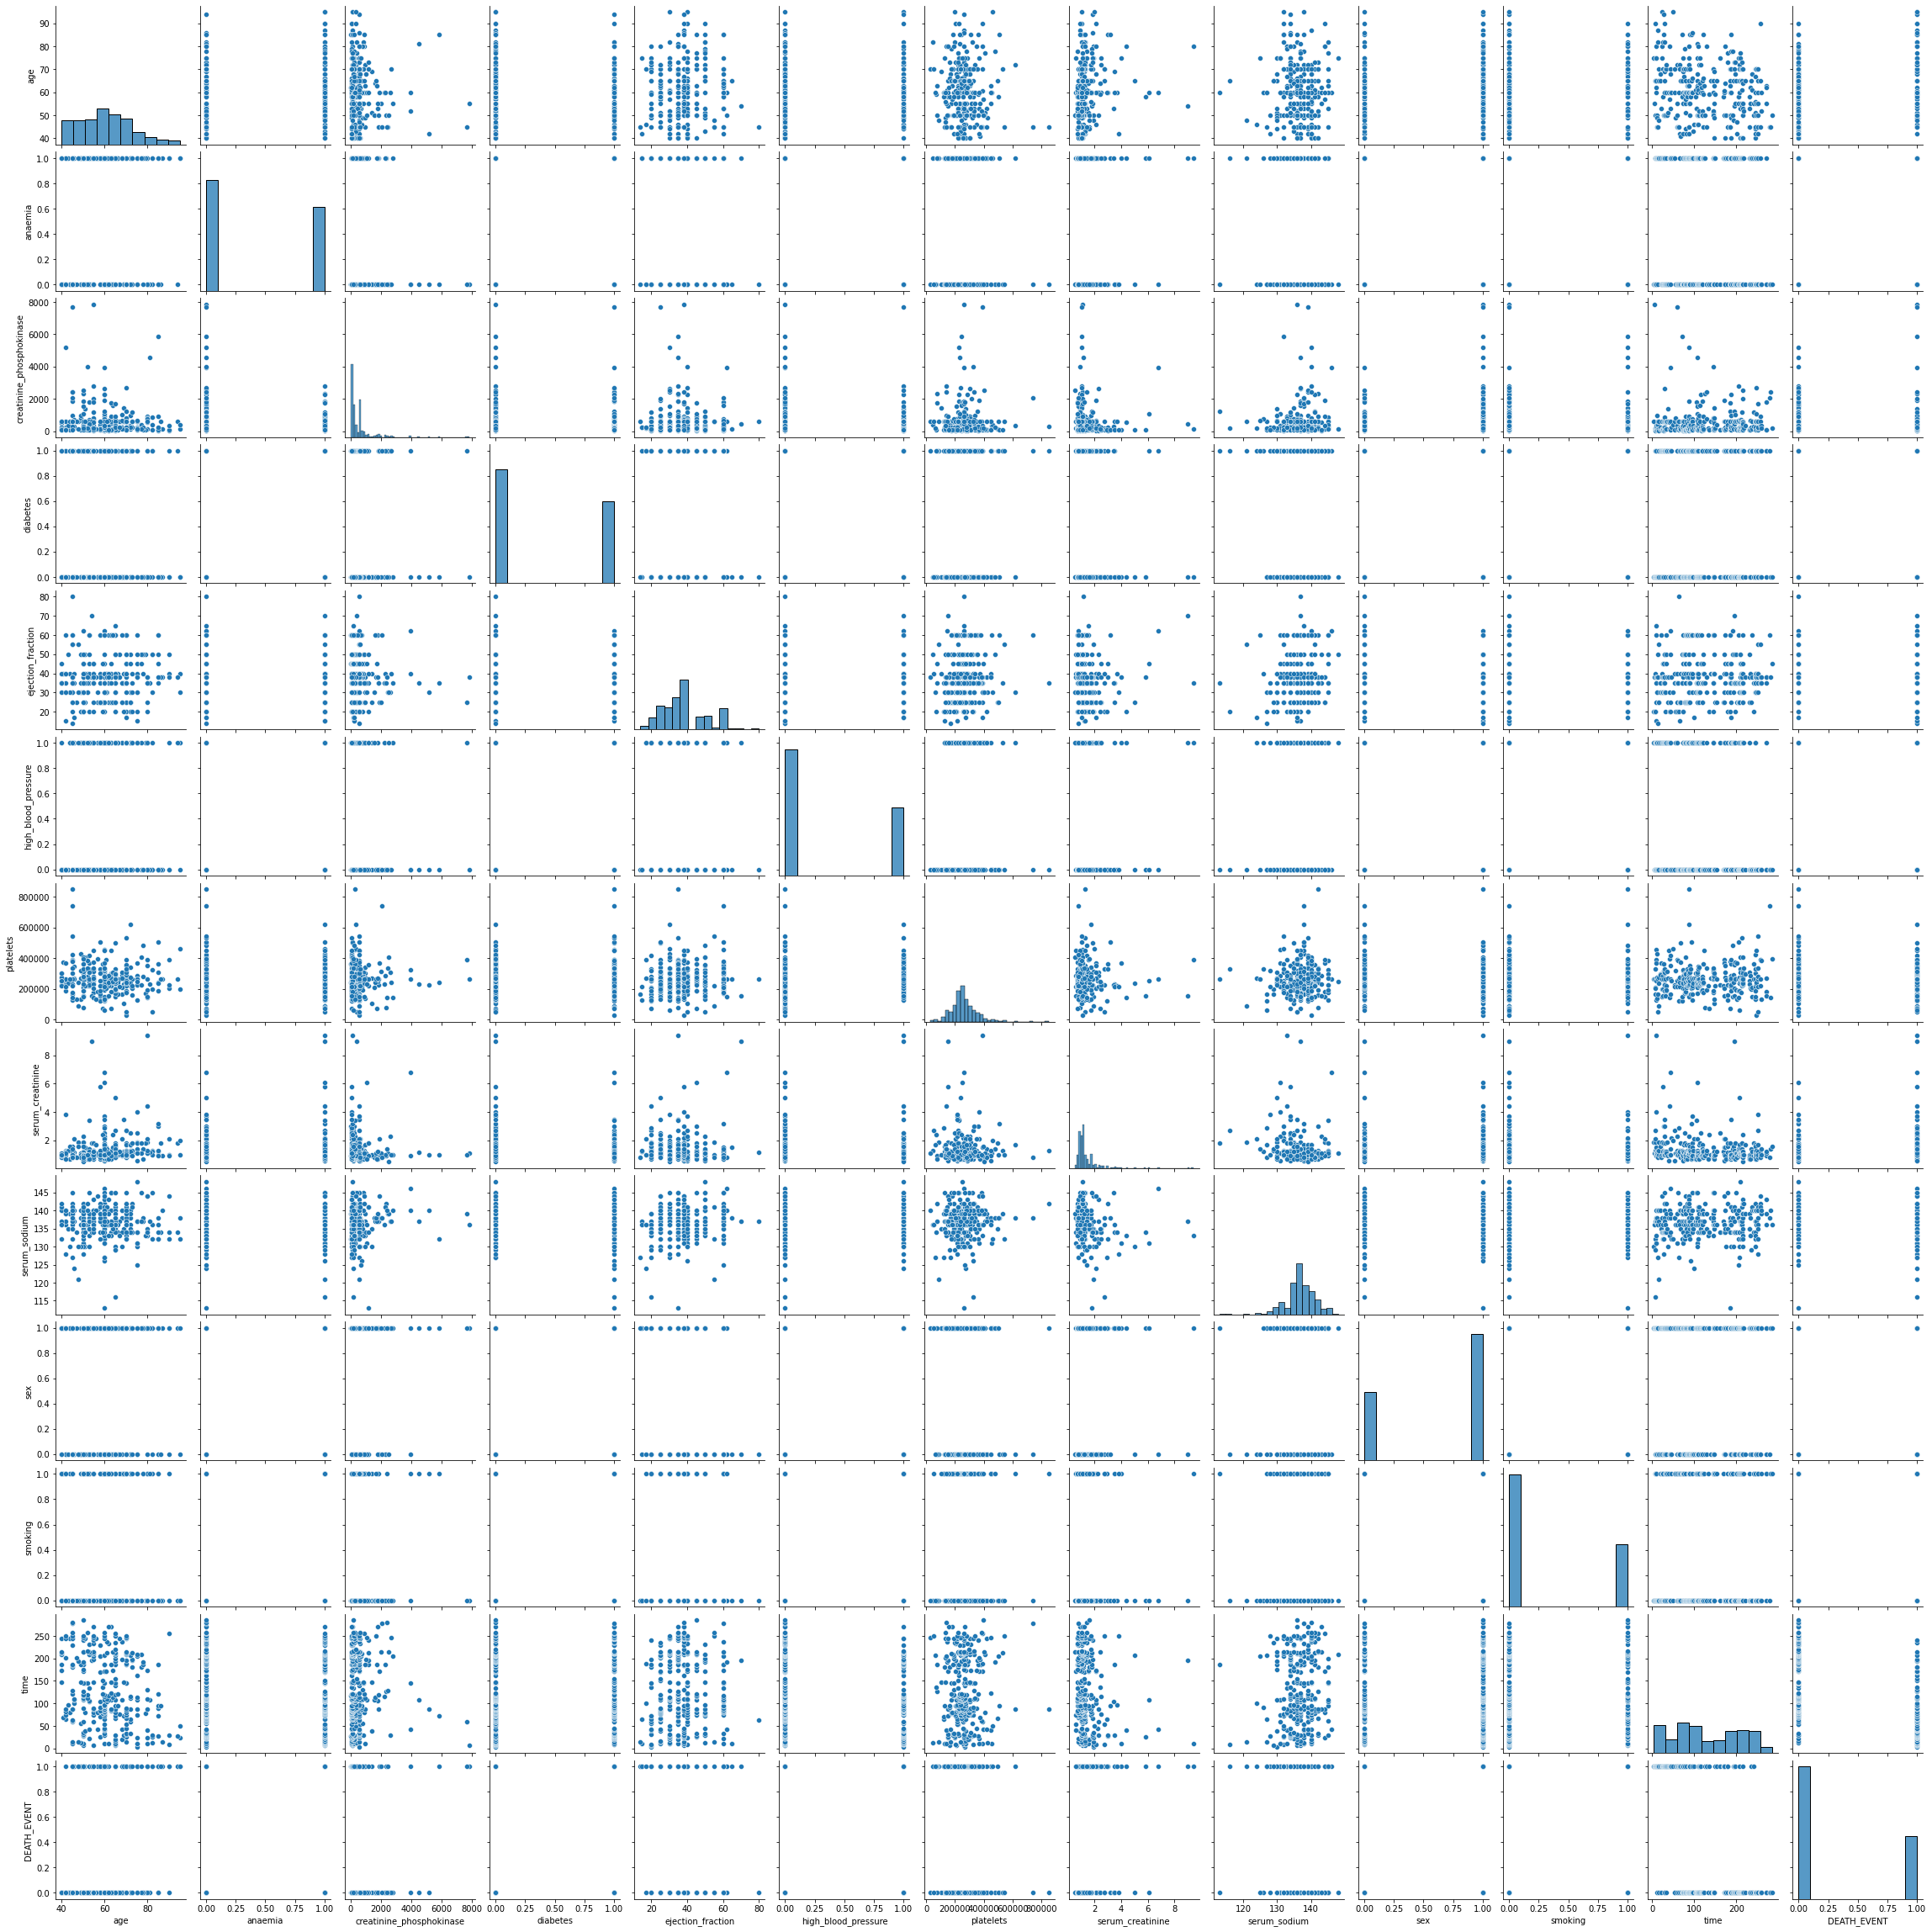

In [ ]:
# Pair plotting 
sns.pairplot(heart_failure_df)

## Training the Model

We will be using K-means clustering as the unsupervised learning technique for our training purposes. 

In [ ]:
import seaborn as sns # for statistical data visualization
from sklearn.metrics import silhouette_samples, silhouette_score

We will be splitting the dataset into training and testing data. The training data will be directly fed to the K-means clustering algorithm for training purpose and the aim of our model is to predict the death events that has occured from the dataset.

In [ ]:
X = heart_failure_df
y = heart_failure_df['DEATH_EVENT']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['DEATH_EVENT'] = le.fit_transform(X['DEATH_EVENT'])
y = le.transform(y)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
cols = X.columns

Since we saw from df.head() our dataset is not in a standardized range. All the values are scattered across different ranges and we need a normalized dataset to feed into our model. For that purpose we will standardise our dataset using a technique called MinMaxScalar.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


The k-means cluster is initialized in the below cell. We have decided to go with cluster value of 2 in our first trial run with the initialization value of k-means++

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++') 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

The cluster center will provide us with a centroid array of the clusters.

In [ ]:
kmeans.cluster_centers_

array([[ 3.89190909e-01,  3.96907216e-01,  7.85533339e-02,
         3.60824742e-01,  3.45360825e-01,  3.14432990e-01,
         2.77937023e-01,  1.01030928e-01,  6.72459499e-01,
         1.00000000e+00,  4.74226804e-01,  4.46160619e-01,
         3.19587629e-01],
       [ 3.59596017e-01,  4.95238095e-01,  5.78949926e-02,
         5.23809524e-01,  4.01010101e-01,  4.19047619e-01,
         3.08963537e-01,  9.93365436e-02,  6.79727891e-01,
        -1.77635684e-15,  3.80952381e-02,  4.55177089e-01,
         3.23809524e-01]])

Intertia will help us in determining how far away the points are within a cluster. The lower the score of intertia the better the results.

In [ ]:
kmeans.inertia_

391.79338865793113

Did this to see which is the best k value is the best for the data distribution. As you can see the value to be predicted is either true or false (Here we represent as 1 or 0).

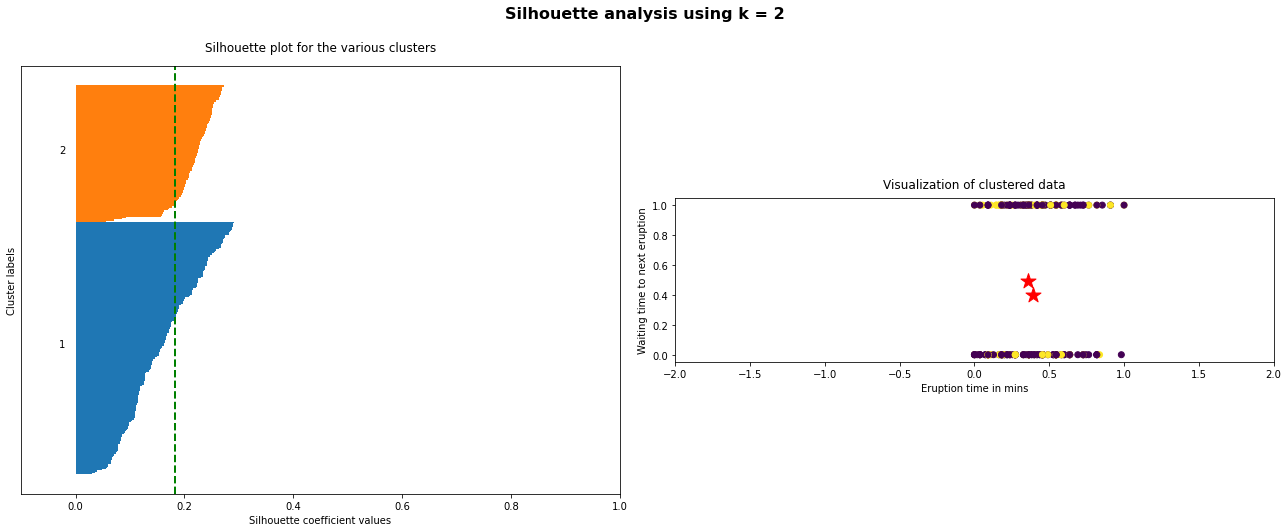

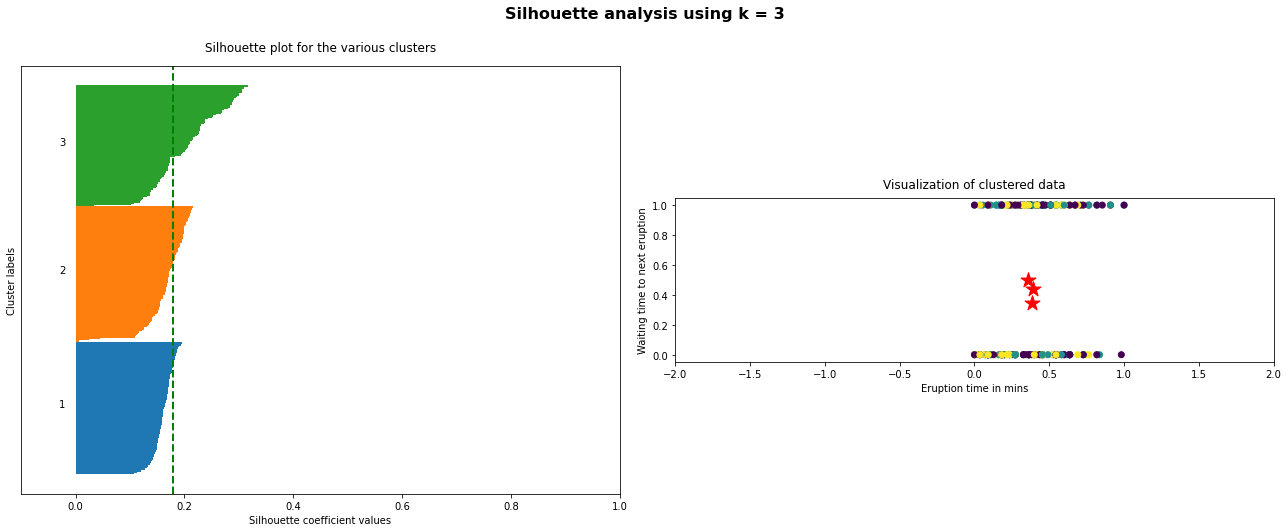

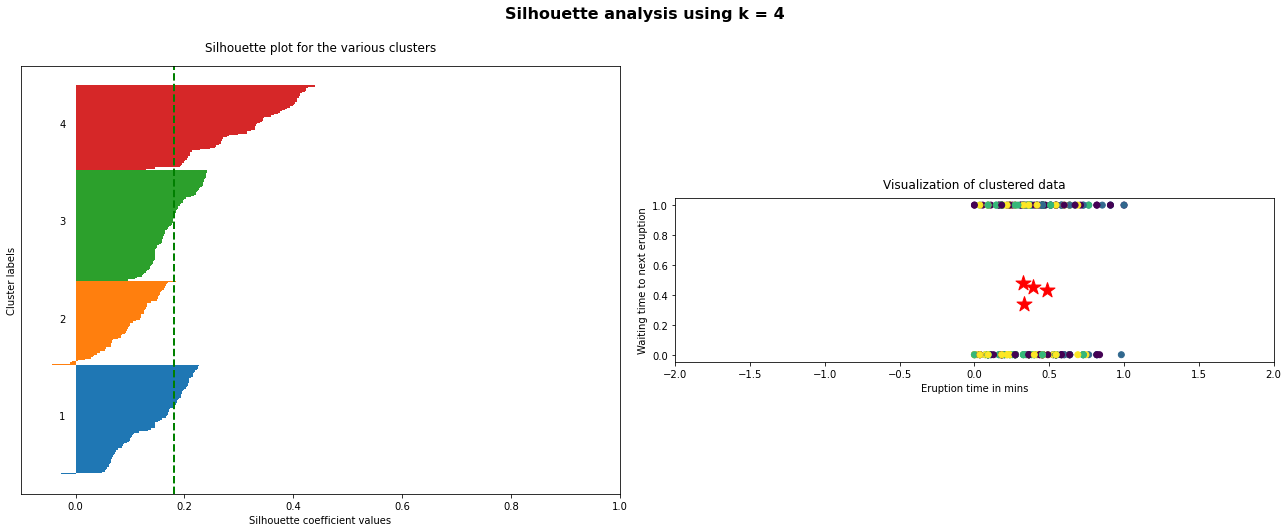

In [ ]:
import numpy as np
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Next we tried to predict the value of death from the dataset. As you can see that our cluster were separated into 2 separate group and we tried to predict the death rate from this clustered values. The below study shows us that we are getting an accuracy of 56 % in our testing process. This could be improved by increasting the number of clusters. But be careful as we keep on increasing the cluster values, this will affect the model performance as it will start to overfit. For this reason we will use the Elbow curve to determine the best clustering value for K-means algorithm.

In [ ]:
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 166 out of 299 samples were correctly labeled.
Accuracy score: 0.56


As you can see from the Elbow method that the best fit cluster value for our dataset is between 2 and 4. We will implement 3 as the cluster value for our model.

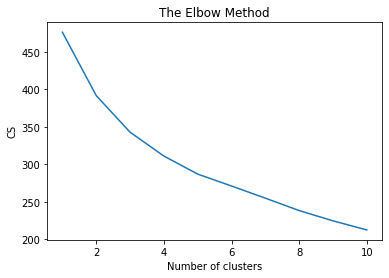

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

## Changing cluster value

All the changes that happened when we changed the cluster value from 2 to 3 is shown here.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++') 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_

array([[ 3.57459266e-01,  4.90384615e-01,  5.80775119e-02,
         5.28846154e-01,  4.02534965e-01,  4.13461538e-01,
         3.04988277e-01,  9.89952463e-02,  6.79395604e-01,
        -1.77635684e-15,  2.88461538e-02,  4.56679442e-01,
         3.17307692e-01],
       [ 3.42424242e-01,  3.86363636e-01,  7.13250133e-02,
         3.78787879e-01,  3.84871442e-01,  2.95454545e-01,
         2.77769944e-01,  8.11712632e-02,  6.88744589e-01,
         1.00000000e+00,  4.92424242e-01,  5.46748625e-01,
         1.66533454e-16],
       [ 4.90235786e-01,  4.28571429e-01,  9.30691746e-02,
         3.17460317e-01,  2.60942761e-01,  3.65079365e-01,
         2.85341911e-01,  1.43178170e-01,  6.39002268e-01,
         9.84126984e-01,  4.44444444e-01,  2.33067842e-01,
         1.00000000e+00]])

The biggest difference we can see is the improvement in the value of inertia. The points became more closer to the centroid hence the imporvement in accuracy is evident.

In [ ]:
kmeans.inertia_

342.93355620946375

In [ ]:
labels = kmeans.labels_
print(labels)

# check how many of the samples were correctly labeled
for i in range(0,len(labels)):
  if labels[i] == 2:
    labels[i] = 0
print(labels)
correct_labels = sum(y != labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

[2 2 2 2 0 2 2 2 0 2 2 2 2 2 0 2 2 2 0 0 0 0 2 1 0 2 0 2 2 2 2 2 0 0 2 2 2
 0 1 0 2 0 2 1 0 2 2 2 2 0 2 0 0 0 0 2 1 1 2 2 2 0 1 2 0 2 0 2 0 2 1 1 2 1
 2 2 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 2 0 1 1 0 0 0 1 1 1 1 0 2 1 1 1 1 2
 1 1 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 2 0 0 0 2 1 1 1
 2 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 2 0 1 2 0 0 1 1 1 1 1 1 1 0 1 1 1 2 2 2 2
 2 0 0 0 0 1 0 1 1 2 2 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 2 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 2 1 1 0 0 0 1 0 1 1 0 1 1
 1 1 0 2 0 1 1 2 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0
 0 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 1 

#### There is a significant rise in the accuracy level when we changed the clustering value from 2 to 3. Here we see that the current model predicted value with an accuracy score of 76%. That is like 20% improvement in the accuracy level.

In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.76


We are stopping our training with clustering value 3. We feel that increasing the value of clustering could definitely help in improving the model but when we deploy the model for classification the model might exhibit the property of overfitting. We are also considering the fact of the dataset size and since we only have a small dataset of 299 records in total, clustering it further and further will definitely donot help in our classification problem.

Let's now try to increase the iteration loop of the k-means cluster and see if there is an improvement in our model.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++', max_iter = 200) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_

array([[ 3.57459266e-01,  4.90384615e-01,  5.80775119e-02,
         5.28846154e-01,  4.02534965e-01,  4.13461538e-01,
         3.04988277e-01,  9.89952463e-02,  6.79395604e-01,
        -1.77635684e-15,  2.88461538e-02,  4.56679442e-01,
         3.17307692e-01],
       [ 3.42424242e-01,  3.86363636e-01,  7.13250133e-02,
         3.78787879e-01,  3.84871442e-01,  2.95454545e-01,
         2.77769944e-01,  8.11712632e-02,  6.88744589e-01,
         1.00000000e+00,  4.92424242e-01,  5.46748625e-01,
         1.66533454e-16],
       [ 4.90235786e-01,  4.28571429e-01,  9.30691746e-02,
         3.17460317e-01,  2.60942761e-01,  3.65079365e-01,
         2.85341911e-01,  1.43178170e-01,  6.39002268e-01,
         9.84126984e-01,  4.44444444e-01,  2.33067842e-01,
         1.00000000e+00]])

In [ ]:
kmeans.inertia_

342.93355620946375

In [ ]:
labels = kmeans.labels_
print(labels)

# check how many of the samples were correctly labeled
for i in range(0,len(labels)):
  if labels[i] == 2:
    labels[i] = 0
print(labels)
correct_labels = sum(y != labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

[2 2 2 2 0 2 2 2 0 2 2 2 2 2 0 2 2 2 0 0 0 0 2 1 0 2 0 2 2 2 2 2 0 0 2 2 2
 0 1 0 2 0 2 1 0 2 2 2 2 0 2 0 0 0 0 2 1 1 2 2 2 0 1 2 0 2 0 2 0 2 1 1 2 1
 2 2 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 2 0 1 1 0 0 0 1 1 1 1 0 2 1 1 1 1 2
 1 1 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 2 0 0 0 2 1 1 1
 2 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 2 0 1 2 0 0 1 1 1 1 1 1 1 0 1 1 1 2 2 2 2
 2 0 0 0 0 1 0 1 1 2 2 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 2 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 2 1 1 0 0 0 1 0 1 1 0 1 1
 1 1 0 2 0 1 1 2 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0
 0 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 1 

In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.76


As you can see that there in no significant change in the model accuracy or the inertia, we will stop our training purpose in this level.

Overall, an unsupervised clustering algorithm like k-means clustering is not a very good choice for classification problems because the accuracy tends to be lesser than a supervised learning algorithm. One quick solution for this is by increasing the dataset and then try to cluster it again.